In [ ]:
# Seaborn for Machine Learning Visualization

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
df = sns.load_dataset('titanic')  # Example dataset

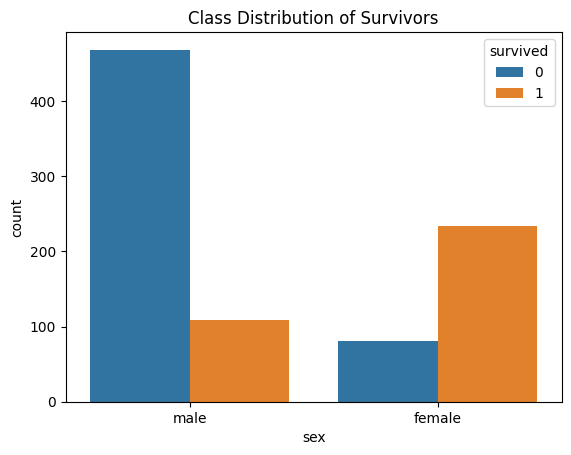

In [ ]:
#Visualizing Data Splits & Class Imbalance

# Count Plot for Class Distribution
sns.countplot(x="sex", hue="survived", data=df)
plt.title("Class Distribution of Survivors")
plt.show()

<ipython-input-3-8933da2ad15d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = df['sex'].map({'male': 0, 'female': 1})
<ipython-input-3-8933da2ad15d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'] = df['class'].map({'First': 1, 'Second': 2, 'Third': 3})


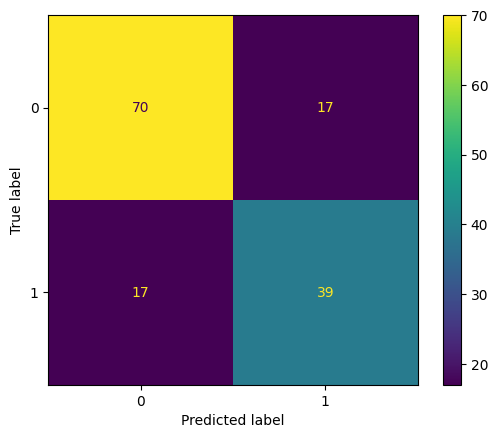

In [ ]:
## Module 5: Model Evaluation & Diagnostic Visuals

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Prepare Data
df = df.dropna(subset=['age', 'fare', 'sex', 'class', 'survived'])
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['class'] = df['class'].map({'First': 1, 'Second': 2, 'Third': 3})
X = df[['age', 'fare', 'sex', 'class']]
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

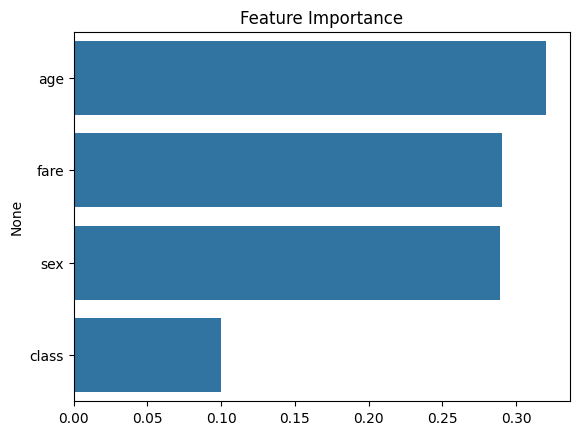

In [ ]:
## Module 6: Feature Importance & Dimensionality Reduction

import numpy as np
importances = model.feature_importances_
features = X.columns
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

# Load the 'tips' dataset
tips = sns.load_dataset('tips')
# Convert 'sex' column to binary classification (Male=1, Female=0)
tips['sex'] = tips['sex'].map({'Male': 1, 'Female': 0})

In [ ]:
# Regression: Predict 'tip' based on 'total_bill'
X_reg = tips[['total_bill']]
y_reg = tips['tip']
reg_model = LinearRegression()
reg_model.fit(X_reg, y_reg)
y_pred_reg = reg_model.predict(X_reg)

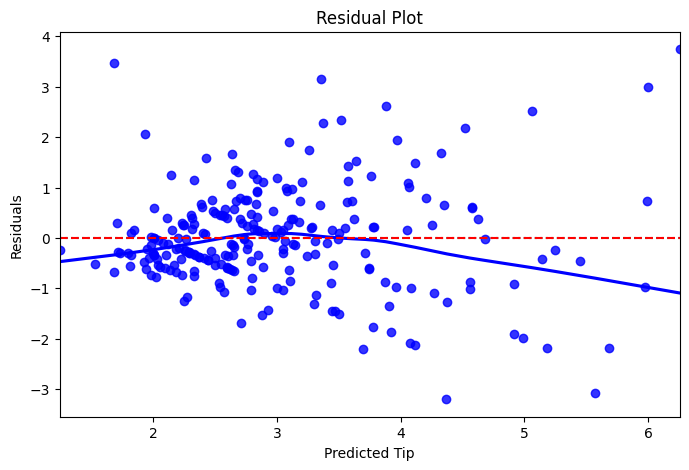

In [ ]:
# Residual Plot
plt.figure(figsize=(8,5))
sns.residplot(x=y_pred_reg, y=y_reg - y_pred_reg, lowess=True, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Tip')
plt.ylabel('Residuals')
plt.show()

In [ ]:
# Classification: Predict 'sex' based on 'total_bill' and 'tip'
X_clf = tips[['total_bill', 'tip']]
y_clf = tips['sex']
X_train, X_test, y_train, y_test = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

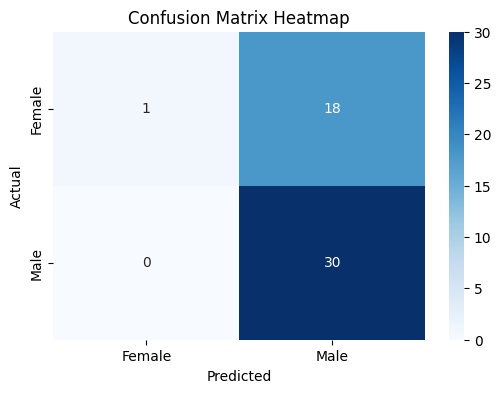

In [ ]:
# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

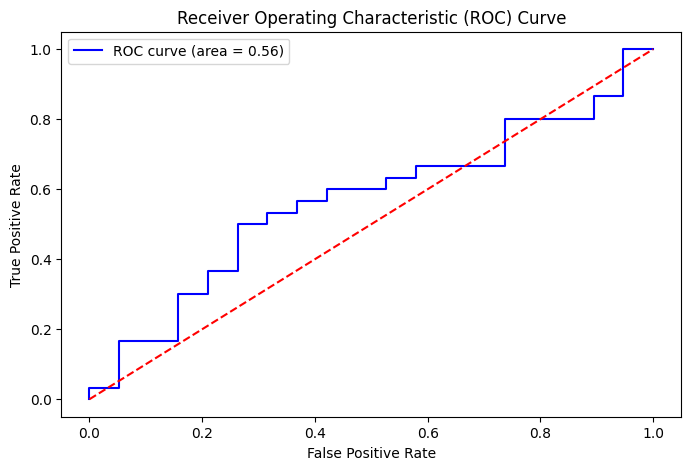

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

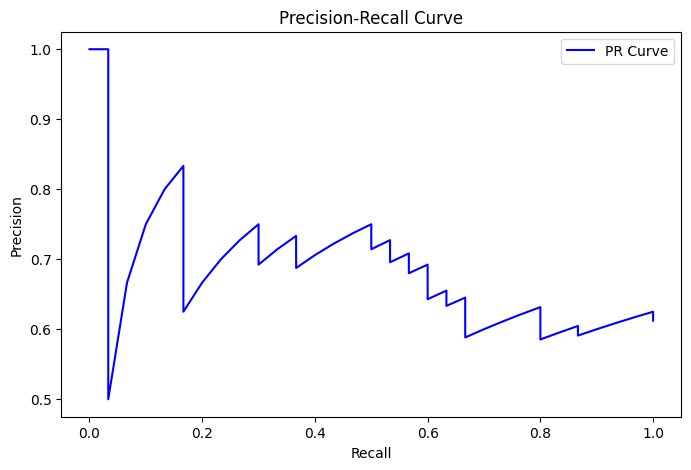

In [ ]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(8,5))
plt.plot(recall, precision, color='blue', label='PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1301, in fit
    raise ValueError(
ValueE

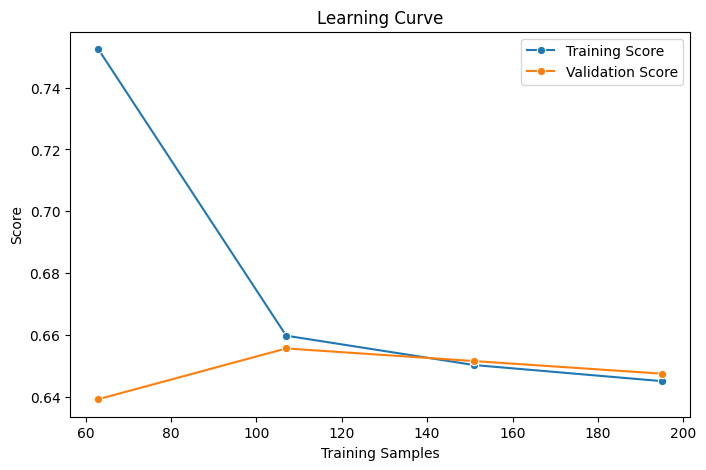

In [ ]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(clf, X_clf, y_clf, cv=5)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,5))
sns.lineplot(x=train_sizes, y=train_mean, label='Training Score', marker='o')
sns.lineplot(x=train_sizes, y=test_mean, label='Validation Score', marker='o')
plt.xlabel('Training Samples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()


# Facet Grid

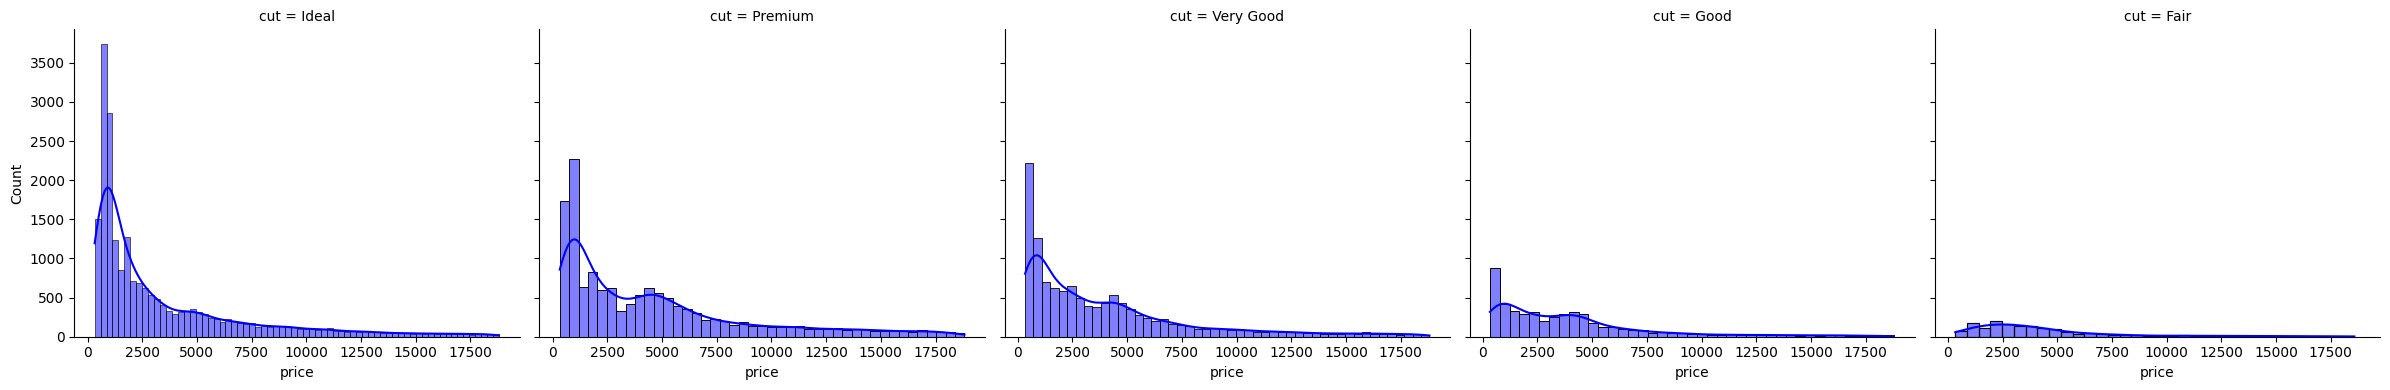

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
diamonds = sns.load_dataset("diamonds")

# Create FacetGrid for price distribution by cut
g = sns.FacetGrid(diamonds, col="cut", height=4, aspect=1.2)
g.map(sns.histplot, "price", kde=True, color="blue")

plt.show()

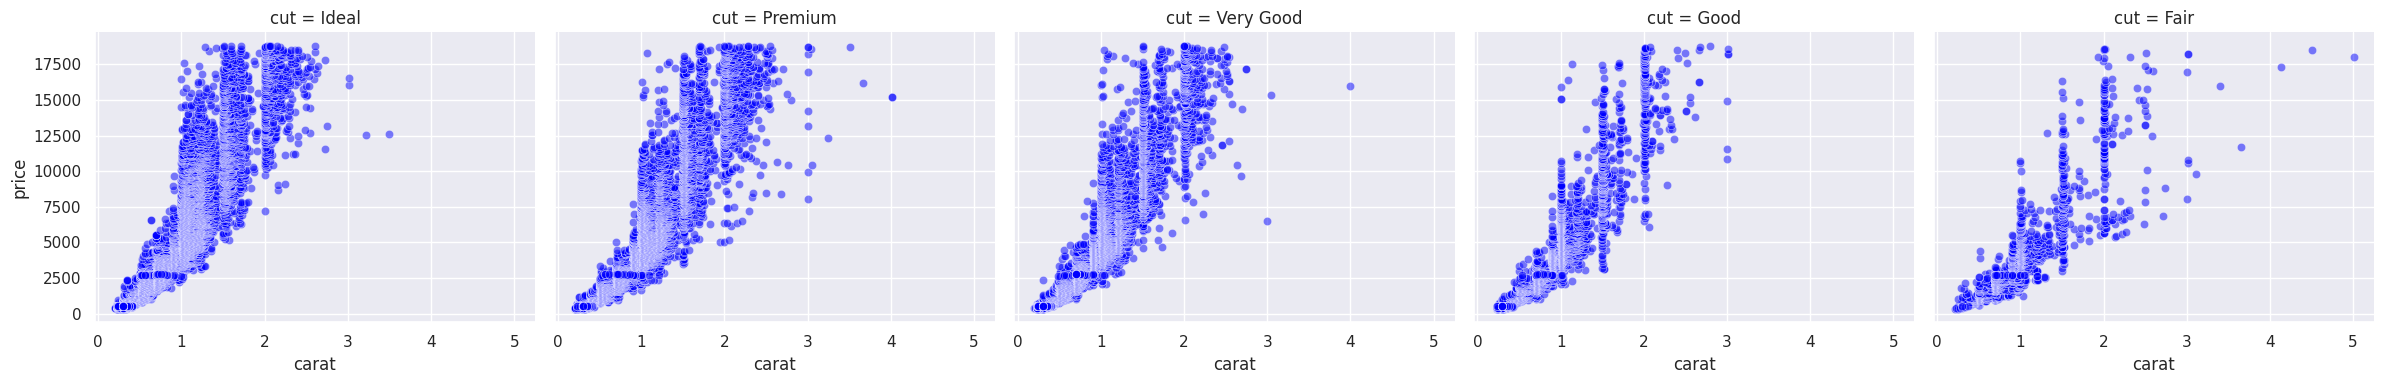

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
diamonds = sns.load_dataset("diamonds")

# Create FacetGrid for scatter plot of carat vs price by cut
g = sns.FacetGrid(diamonds, col="cut", height=4, aspect=1.2)
g.map(sns.scatterplot, "carat", "price", alpha=0.5, color="blue")

plt.show()


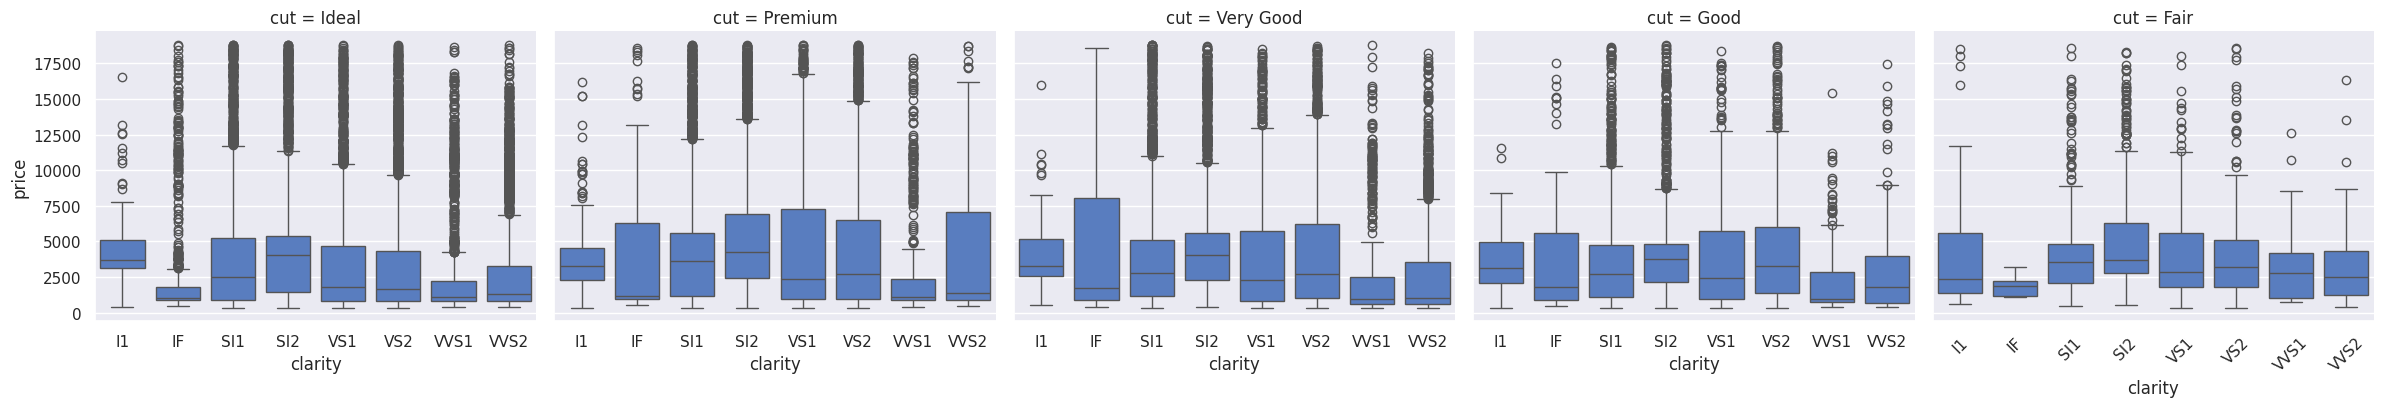

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
diamonds = sns.load_dataset("diamonds")

# Create FacetGrid for box plot of price by cut, separated by clarity
g = sns.FacetGrid(diamonds, col="cut", height=4, aspect=1.2)
g.map(sns.boxplot, "clarity", "price", order=sorted(diamonds["clarity"].unique()))

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [4]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**FacetGrid**
* Creates multiple subplots (facets) using different subsets of data.
* Each facet shows the same type of plot but for different categories.
* Useful for comparing distributions, trends, or relationships across different groups.